# LGD and EAD Model

### LGD Model:

LGD, or Loss Given Default, represents the proportion of a loan that is not recovered in the event of default. This model aims to estimate the recovery rate, calculated as the ratio of actual recoveries to the funded amount.

To develop the LGD model, a two-stage approach is employed:

1. **Stage 1 - Logistic Regression on Recovery Rate**:
   - A logistic regression model is applied to the recovery rate to classify loans into two groups: those with a recovery rate greater than zero and those with zero recovery rate.
   
2. **Stage 2 - Linear Regression on Positive Recovery Rates**:
   - For loans with a recovery rate greater than zero, a linear regression model is utilized to estimate the recovery rate.

The results from both stages are combined using the pickle module for efficient storage and retrieval.

### EAD Model:

EAD, or Exposure at Default, measures the potential exposure a bank faces when a borrower defaults. It is calculated as the proportion of the funded amount that remains outstanding at default.

The EAD model adopts a straightforward approach:

- **Linear Regression on Credit Conversion Factor (CCF)**:
  - The CCF, calculated as the ratio of outstanding principal to the funded amount, is estimated using a linear regression model.

### Model Integration:

After validating each stage of the LGD model, including the logistic regression and subsequent linear regression, and developing the EAD model, they are integrated into the credit risk assessment process. The PD (Probability of Default) model is imported using the pickle module, and all three models—PD, LGD, and EAD—are utilized to calculate the Expected Loss (EL) for each loan category. 

The EL is determined by multiplying the probabilities of default, the estimated recovery rates, and the exposure at default. Finally, the overall Expected Loss of the bank is computed, providing valuable insights into potential credit risks and informing strategic decision-making processes.

# Import Libraries 

In [635]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [636]:
loan_data_preprocessed_backup = pd.read_csv('C:/Users/91942/Desktop/loan/LoanDataPreprocessed.csv')

In [637]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [638]:
loan_data_preprocessed['int_rate'] = loan_data_preprocessed['int_rate'].str.rstrip('%').astype(float)
loan_data_preprocessed['int_rate'] = pd.to_numeric(loan_data_preprocessed['int_rate'])

### Importing the loans which have defaulted

In [639]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off'])]

In [640]:
loan_data_defaults.shape

(5627, 183)

In [641]:
pd.options.display.max_columns = None

In [642]:
loan_data_defaults.isnull().sum()

Unnamed: 0                 0
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
                          ..
addr_state : WA            0
addr_state : WI            0
addr_state : WV            0
addr_state : WY            0
initial_list_status : f    0
Length: 183, dtype: int64

# Independent Variables

These are the two variables which need to be handled, as we cannot leave them blank while fitting linear regression model.

In [643]:
loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)

In [644]:
loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)

# Dependent Variables

### Dependent Variable for LGD Model

#### Creating dependent varible : recovery_rate

In [645]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [646]:
loan_data_defaults['recovery_rate'].describe()

count    5627.000000
mean        0.054445
std         0.118119
min         0.000000
25%         0.000000
50%         0.030801
75%         0.047997
max         1.055029
Name: recovery_rate, dtype: float64

In [647]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0,loan_data_defaults['recovery_rate'])

### Dependent Variable for EAD Model

#### Creating dependent varible : CCF - Credit Conversion Factor

In [648]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [649]:
loan_data_defaults['CCF'].describe()

count    5627.000000
mean        0.644547
std         0.245609
min         0.011554
25%         0.467151
50%         0.693838
75%         0.853843
max         1.000000
Name: CCF, dtype: float64

In [650]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore Dependent Varibles

In [651]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.338e+03, 1.134e+03, 1.171e+03, 2.430e+02, 1.700e+02, 1.000e+02,
        6.500e+01, 3.300e+01, 3.300e+01, 3.500e+01, 2.500e+01, 3.000e+01,
        1.300e+01, 1.500e+01, 1.600e+01, 8.000e+00, 1.700e+01, 1.300e+01,
        1.600e+01, 6.000e+00, 1.500e+01, 7.000e+00, 7.000e+00, 5.000e+00,
        7.000e+00, 9.000e+00, 6.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 5.000e+00,
        1.000e+00, 5.000e+00, 5.000e+00, 7.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 8.000e+00, 5.000e+00,
        4.000e+00, 8.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

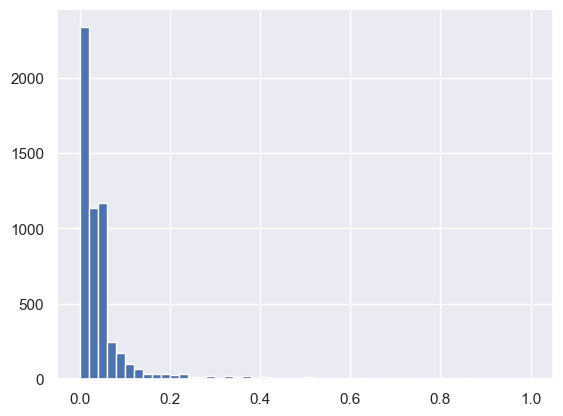

In [652]:
plt.hist(loan_data_defaults['recovery_rate'],bins=50)

- A large number of loans as many as 2500 have a recovery_rate as 0.

(array([ 13.,  25.,  35.,  14.,  43.,  33.,  39.,  49.,  33.,  63.,  67.,
         58.,  68.,  71.,  63.,  81.,  92.,  79., 103.,  74.,  98., 110.,
         91.,  95., 129., 119., 105., 123., 121., 130., 119., 102., 144.,
        141., 161., 149., 161., 198., 173., 165., 187., 199., 204., 206.,
        203., 216., 199., 182., 181., 113.]),
 array([0.01155417, 0.03132308, 0.051092  , 0.07086092, 0.09062983,
        0.11039875, 0.13016767, 0.14993658, 0.1697055 , 0.18947442,
        0.20924333, 0.22901225, 0.24878117, 0.26855008, 0.288319  ,
        0.30808792, 0.32785683, 0.34762575, 0.36739467, 0.38716358,
        0.4069325 , 0.42670142, 0.44647033, 0.46623925, 0.48600817,
        0.50577708, 0.525546  , 0.54531492, 0.56508383, 0.58485275,
        0.60462167, 0.62439058, 0.6441595 , 0.66392842, 0.68369733,
        0.70346625, 0.72323517, 0.74300408, 0.762773  , 0.78254192,
        0.80231083, 0.82207975, 0.84184867, 0.86161758, 0.8813865 ,
        0.90115542, 0.92092433, 0.94069325, 0.

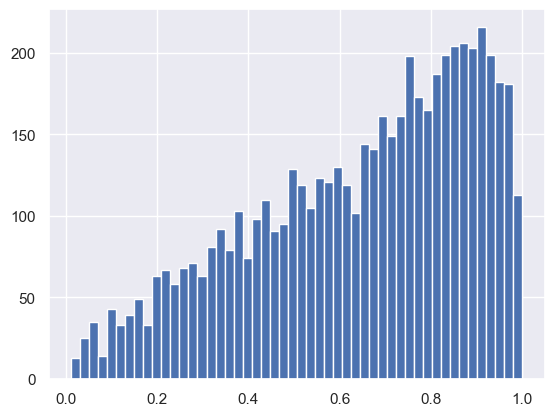

In [653]:
plt.hist(loan_data_defaults['CCF'],bins=50)

- The CCF is well distributed from 0-1.

In [654]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [655]:
loan_data_defaults['recovery_rate_0_1']

1        1
8        1
9        1
12       1
14       1
        ..
39667    1
39668    0
39669    0
39678    1
39688    0
Name: recovery_rate_0_1, Length: 5627, dtype: int32

# LGD Model

<div style="text-align: center;">
    <img src="LGD.png">
</div>

- Every observation classified as **0** by **Stage-1 Logistic Regression Model** has estimated recovery rate as **0**.
- Every observation classified as **1** by **Stage-1 Logistic Regression Model** has estimated recovery rate as per the **Stage-2 Linear Regression Model.**

## LGD Stage-1 : Logistic Regression

### Splitting Data

In [656]:
from sklearn.model_selection import train_test_split

In [657]:
lgd_inputs_stage_1_train , lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

#### Selecting features to train

In [658]:
features_all = [
       'grade : A', 'grade : B', 'grade : C', 'grade : D', 'grade : E',
       'grade : F', 'grade : G','home_ownership : MORTGAGE', 'home_ownership : NONE',
       'home_ownership : OTHER', 'home_ownership : OWN',
       'home_ownership : RENT', 'verification_status : Not Verified',
       'verification_status : Source Verified',
       'verification_status : Verified','purpose : car', 'purpose : credit_card',
       'purpose : debt_consolidation', 'purpose : educational',
       'purpose : home_improvement', 'purpose : house',
       'purpose : major_purchase', 'purpose : medical',
       'purpose : moving', 'purpose : other',
       'purpose : renewable_energy', 'purpose : small_business',
       'purpose : vacation', 'purpose : wedding','initial_list_status : f',
       'term_int','emp_length_int','mnths_since_issue_d','mnths_since_earliest_cr_line',
       'funded_amnt','int_rate','installment','annual_inc','dti','delinq_2yrs', 
       'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record','open_acc',
       'pub_rec','total_acc','acc_now_delinq'
]

In [659]:
features_reference_cat = [
   'grade : G',
   'home_ownership : RENT',
   'purpose : small_business',
   'verification_status : Not Verified',
   'initial_list_status : f'
]

### Training the model

In [660]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [661]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat,axis=1)

In [662]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [663]:
reg_lgd_st_1 = LogisticRegression()

In [664]:
lgd_inputs_stage_1_train.shape

(4501, 42)

In [665]:
lgd_targets_stage_1_train.shape

(4501,)

In [666]:
reg_lgd_st_1.fit(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)

LogisticRegression()

#### Creating Summary table

In [667]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [668]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()

In [669]:
import statsmodels.api as sm

X_train = sm.add_constant(lgd_inputs_stage_1_train)
y_train = lgd_targets_stage_1_train

In [670]:
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

In [671]:
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = glm_model.fit()

In [672]:
results_table = result.summary2().tables[1]
p_values = result.pvalues
summary_table2 = pd.DataFrame({'p_values': p_values})
summary_table2.reset_index(inplace=True)
summary_table2.rename(columns={'index': 'Feature name'}, inplace=True)
summary_table3 = pd.merge(summary_table, summary_table2, on='Feature name')
summary_table3.index = summary_table3.index + 1
summary_table3.loc[0] = ['Intercept',reg_lgd_st_1.intercept_[0], 2.201602e-01]
summary_table3 = summary_table3.sort_index()
summary_table = summary_table3

In [673]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.000200,2.201602e-01
1,grade : A,-0.000088,6.894702e-01
2,grade : B,-0.000324,8.864163e-01
3,grade : C,-0.000006,6.926964e-01
4,grade : D,0.000467,2.748909e-01
5,grade : E,0.000013,8.144831e-01
6,grade : F,0.000110,6.322998e-01
7,home_ownership : MORTGAGE,-0.000481,2.316856e-02
8,home_ownership : NONE,0.000000,6.412063e-01
9,home_ownership : OTHER,-0.000004,7.517802e-01


### Testing the Model

In [674]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [675]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat,axis=1)

In [676]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.predict(lgd_inputs_stage_1_test)

In [677]:
y_hat_test_lgd_stage_1

array([1, 1, 1, ..., 1, 1, 1])

In [678]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.predict_proba(lgd_inputs_stage_1_test)

In [679]:
y_hat_test_proba_lgd_stage_1

array([[0.2348869 , 0.7651131 ],
       [0.2412598 , 0.7587402 ],
       [0.29852929, 0.70147071],
       ...,
       [0.29292309, 0.70707691],
       [0.21408919, 0.78591081],
       [0.41199517, 0.58800483]])

In [680]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[:][:, 1]

In [681]:
y_hat_test_proba_lgd_stage_1

array([0.7651131 , 0.7587402 , 0.70147071, ..., 0.70707691, 0.78591081,
       0.58800483])

In [682]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [683]:
lgd_targets_stage_1_test_temp.reset_index(drop = True,inplace = True)

In [684]:
df_actual_predicted_proba = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [685]:
df_actual_predicted_proba.columns = ['lgd_targets_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [686]:
df_actual_predicted_proba.index = lgd_inputs_stage_1_test.index

In [687]:
df_actual_predicted_proba.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
29735,1,0.765113
10421,0,0.758740
6841,1,0.701471
15014,1,0.579749
30869,1,0.724229


### Estimating the Accuracy of the Model

#### Accuracy based on given threshold

In [688]:
tr = 0.5
df_actual_predicted_proba['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_proba['y_hat_test_proba_lgd_stage_1'] > tr,1,0)

In [689]:
pd.crosstab(df_actual_predicted_proba['lgd_targets_stage_1_test'], df_actual_predicted_proba['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,3,284
1,4,835


In [690]:
pd.crosstab(df_actual_predicted_proba['lgd_targets_stage_1_test'], df_actual_predicted_proba['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]

Predicted,0,1
Actual,,
0,0.002664,0.252220
1,0.003552,0.741563


In [691]:
(pd.crosstab(df_actual_predicted_proba['lgd_targets_stage_1_test'], df_actual_predicted_proba['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[1,1]

0.7415630550621669

#### Accuracy based on ROC Curve

In [692]:
from sklearn.metrics import roc_curve, roc_auc_score

In [693]:
fpr , tpr, threshold = roc_curve(df_actual_predicted_proba['lgd_targets_stage_1_test'],df_actual_predicted_proba['y_hat_test_proba_lgd_stage_1'] )

Text(0.5, 1.0, 'ROC Curve')

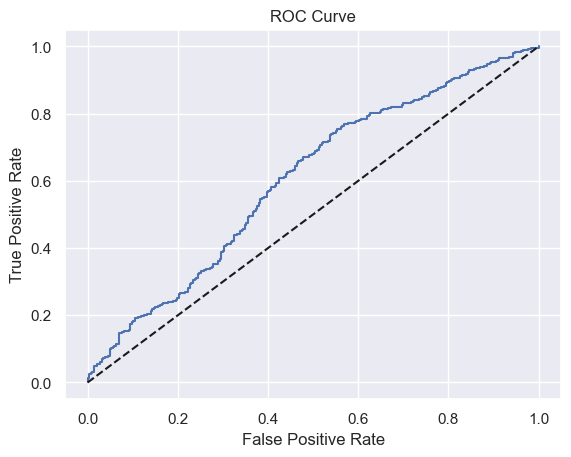

In [694]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [695]:
AUROC = roc_auc_score(df_actual_predicted_proba['lgd_targets_stage_1_test'],df_actual_predicted_proba['y_hat_test_proba_lgd_stage_1'])
AUROC

0.603833998496634

#### Saving the model

In [696]:
import pickle

In [697]:
pickle.dump(reg_lgd_st_1, open('ldg_model_stage_1.sav', 'wb'))

## LGD Stage-2 : Linear Regression

### Splitting Data

In [698]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [699]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1','CCF'],axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

### Training the Model

In [700]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Creating a class for linear model in sklearn to show p-values

In [701]:
import numpy as np
import scipy.stats as stat
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

class LinearRegression(SklearnLinearRegression):
    def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
        super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs, positive=positive)

    def fit(self, X, y):
        super().fit(X, y)
        
        # Ensure X is a numpy array of floats
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        # Calculate SSE and standard errors
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.sqrt(np.diagonal(sse * np.linalg.pinv(np.dot(X.T, X))))
        
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

#### Selecting Features 

In [702]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [703]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [704]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [705]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [706]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.222464e-01,NaN
1,grade : A,3.432954e-02,0.104
2,grade : B,2.193900e-02,0.225
3,grade : C,2.211631e-02,0.195
4,grade : D,1.057246e-02,0.519
5,grade : E,2.804715e-03,0.867
6,grade : F,8.780971e-03,0.628
7,home_ownership : MORTGAGE,6.991436e-03,0.199
8,home_ownership : NONE,6.765422e-17,1.000
9,home_ownership : OTHER,-2.571645e-02,0.581


### Model Evaluation

In [707]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [708]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis=1)

In [709]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [710]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [711]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop=True)

In [712]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.087137
0,0.087137,1.000000


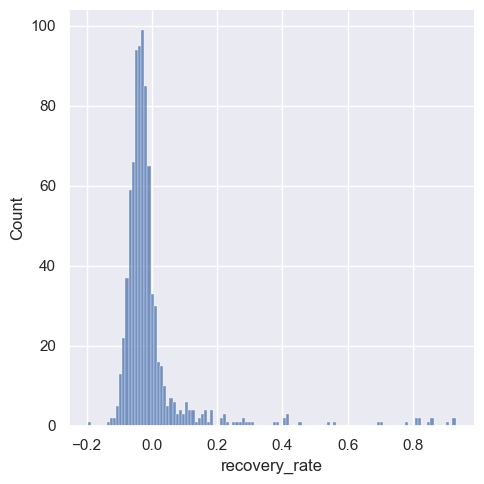

In [713]:
sns.displot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

A good model is one which is normally distributed and as we can see from the graph, most of the data is distributed around 0, so this is a good sign.

### Saving the model

In [714]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav','wb'))

## Combining LGD Stage-1 and Stage-2

In [715]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [716]:
y_hat_test_lgd_stage_2_all

array([0.09131468, 0.07678102, 0.03517477, ..., 0.08824548, 0.08606221,
       0.05402192])

In [717]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [718]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,1126.000000
mean,0.072321
std,0.020847
min,0.000000
25%,0.059108
50%,0.072606
75%,0.083906
max,0.195941


Just a precaution as Linear Regression Model sometimes gives values >1 and <0.

In [719]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 0, 1, y_hat_test_lgd)

# EAD Model

## Splitting Data

In [720]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1','CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [721]:
ead_inputs_train = ead_inputs_train[features_all]

In [722]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis=1)

## Training the Model

In [723]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [724]:
feature_name = ead_inputs_train.columns.values

In [725]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.426715e-01,NaN
1,grade : A,2.828417e-02,0.389
2,grade : B,1.793539e-02,0.530
3,grade : C,2.658696e-02,0.326
4,grade : D,6.333060e-03,0.809
5,grade : E,8.813713e-03,0.742
6,grade : F,-4.154303e-03,0.888
7,home_ownership : MORTGAGE,-1.045104e-02,0.208
8,home_ownership : NONE,-1.621966e-16,NaN
9,home_ownership : OTHER,-4.807837e-02,0.450


- Positive Coefficients indicate increase in the CFF --> Higher Risk
- Negative Coefficients indicate decrease in the CFF --> Lower Risk

## Model Validation

In [726]:
ead_inputs_test = ead_inputs_test[features_all]

In [727]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [728]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [729]:
ead_targets_test_temp = ead_targets_test

In [730]:
eat_targets_test_temp = eat_targets_test_temp.reset_index(drop = True)

In [731]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.032134
0,0.032134,1.000000


A positive correlation is good

<Axes: xlabel='CCF', ylabel='Density'>

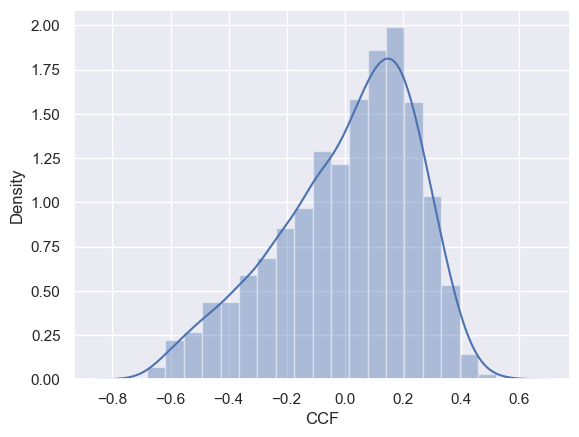

In [732]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [733]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,1126.000000
mean,0.645776
std,0.074765
min,0.407772
25%,0.591796
50%,0.644192
75%,0.700099
max,0.834501


In [734]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

# Expected Loss

In [735]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [736]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [737]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [738]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [739]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.predict(loan_data_preprocessed_lgd_ead)

In [740]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [741]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [742]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [743]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [744]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [745]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [746]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

## Importing PD Model

In [747]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')

In [748]:
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [749]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [750]:
loan_data_inputs_pd.shape

(39717, 290)

In [751]:
loan_data_preprocessed.shape

(39717, 189)

In [754]:
loan_data_inputs_pd.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,mnths_since_issue_d,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,sub_grade : A1,sub_grade : A2,sub_grade : A3,sub_grade : A4,sub_grade : A5,sub_grade : B1,sub_grade : B2,sub_grade : B3,sub_grade : B4,sub_grade : B5,sub_grade : C1,sub_grade : C2,sub_grade : C3,sub_grade : C4,sub_grade : C5,sub_grade : D1,sub_grade : D2,sub_grade : D3,sub_grade : D4,sub_grade : D5,sub_grade : E1,sub_grade : E2,sub_grade : E3,sub_grade : E4,sub_grade : E5,sub_grade : F1,sub_grade : F2,sub_grade : F3,sub_grade : F4,sub_grade : F5,sub_grade : G1,sub_grade : G2,sub_grade : G3,sub_grade : G4,sub_grade : G5,home_ownership : MORTGAGE,home_ownership : NONE,home_ownership : OTHER,home_ownership : OWN,home_ownership : RENT,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,loan_status : Charged Off,loan_status : Current,loan_status : Fully Paid,purpose : car,purpose : credit_card,purpose : debt_consolidation,purpose : educational,purpose : home_improvement,purpose : house,purpose : major_purchase,purpose : medical,purpose : moving,purpose : other,purpose : renewable_energy,purpose : small_business,purpose : vacation,purpose : wedding,addr_state : AK,addr_state : AL,addr_state : AR,addr_state : AZ,addr_state : CA,addr_state : CO,addr_state : CT,addr_state : DC,addr_state : DE,addr_state : FL,addr_state : GA,addr_state : HI,addr_state : IA,addr_state : ID,addr_state : IL,addr_state : IN,addr_state : KS,addr_state : KY,addr_state : LA,addr_state : MA,addr_state : MD,addr_state : ME,addr_state : MI,addr_state : MN,addr_state : MO,addr_state : MS,addr_state : MT,addr_state : NC,addr_state : NE,addr_state : NH,addr_state : NJ,addr_state : NM,addr_state : NV,addr_state : NY,addr_state : OH,addr_state : OK,addr_state : OR,addr_state : PA,addr_state : RI,addr_state : SC,addr_state : SD,addr_state : TN,addr_state : TX,addr_state : UT,addr_state : VA,addr_state : VT,addr_state : WA,addr_state : WI,addr_state : WV,addr_state : WY,initial_list_status : f,home_ownership : OWN_OTHER_NONE,addr_state : ND,addr_state : NE_SD_AK_NV_NM_FL_ND,addr_state : ID_TN_HI_MD_WA_NH,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : renewableEnergy_educational_house,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,verification_status : Verified_SourceVerified,term_int : 36,term_int : 60,emp_length_int : 0,emp_length_int : 1,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d_factor,mnths_since_issue_d : <149,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor,mnths_since_earliest_cr_line_factor : < 194,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor

In [753]:
loan_data_preprocessed.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,mnths_since_issue_d,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,sub_grade : A1,sub_grade : A2,sub_grade : A3,sub_grade : A4,sub_grade : A5,sub_grade : B1,sub_grade : B2,sub_grade : B3,sub_grade : B4,sub_grade : B5,sub_grade : C1,sub_grade : C2,sub_grade : C3,sub_grade : C4,sub_grade : C5,sub_grade : D1,sub_grade : D2,sub_grade : D3,sub_grade : D4,sub_grade : D5,sub_grade : E1,sub_grade : E2,sub_grade : E3,sub_grade : E4,sub_grade : E5,sub_grade : F1,sub_grade : F2,sub_grade : F3,sub_grade : F4,sub_grade : F5,sub_grade : G1,sub_grade : G2,sub_grade : G3,sub_grade : G4,sub_grade : G5,home_ownership : MORTGAGE,home_ownership : NONE,home_ownership : OTHER,home_ownership : OWN,home_ownership : RENT,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,loan_status : Charged Off,loan_status : Current,loan_status : Fully Paid,purpose : car,purpose : credit_card,purpose : debt_consolidation,purpose : educational,purpose : home_improvement,purpose : house,purpose : major_purchase,purpose : medical,purpose : moving,purpose : other,purpose : renewable_energy,purpose : small_business,purpose : vacation,purpose : wedding,addr_state : AK,addr_state : AL,addr_state : AR,addr_state : AZ,addr_state : CA,addr_state : CO,addr_state : CT,addr_state : DC,addr_state : DE,addr_state : FL,addr_state : GA,addr_state : HI,addr_state : IA,addr_state : ID,addr_state : IL,addr_state : IN,addr_state : KS,addr_state : KY,addr_state : LA,addr_state : MA,addr_state : MD,addr_state : ME,addr_state : MI,addr_state : MN,addr_state : MO,addr_state : MS,addr_state : MT,addr_state : NC,addr_state : NE,addr_state : NH,addr_state : NJ,addr_state : NM,addr_state : NV,addr_state : NY,addr_state : OH,addr_state : OK,addr_state : OR,addr_state : PA,addr_state : RI,addr_state : SC,addr_state : SD,addr_state : TN,addr_state : TX,addr_state : UT,addr_state : VA,addr_state : VT,addr_state : WA,addr_state : WI,addr_state : WV,addr_state : WY,initial_list_status : f,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,0.0,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,NaN,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10,1985-01-01,471.0,36,148.0,111.0,95.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

We have the same shape but not the same columns. The indexes were also shuffled during training and testing. But the original indexes are stored in the Unamed column, we can use them to join the two dataframes.

In [755]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [756]:
loan_data_inputs_pd.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,mnths_since_issue_d,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,sub_grade : A1,sub_grade : A2,sub_grade : A3,sub_grade : A4,sub_grade : A5,sub_grade : B1,sub_grade : B2,sub_grade : B3,sub_grade : B4,sub_grade : B5,sub_grade : C1,sub_grade : C2,sub_grade : C3,sub_grade : C4,sub_grade : C5,sub_grade : D1,sub_grade : D2,sub_grade : D3,sub_grade : D4,sub_grade : D5,sub_grade : E1,sub_grade : E2,sub_grade : E3,sub_grade : E4,sub_grade : E5,sub_grade : F1,sub_grade : F2,sub_grade : F3,sub_grade : F4,sub_grade : F5,sub_grade : G1,sub_grade : G2,sub_grade : G3,sub_grade : G4,sub_grade : G5,home_ownership : MORTGAGE,home_ownership : NONE,home_ownership : OTHER,home_ownership : OWN,home_ownership : RENT,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,loan_status : Charged Off,loan_status : Current,loan_status : Fully Paid,purpose : car,purpose : credit_card,purpose : debt_consolidation,purpose : educational,purpose : home_improvement,purpose : house,purpose : major_purchase,purpose : medical,purpose : moving,purpose : other,purpose : renewable_energy,purpose : small_business,purpose : vacation,purpose : wedding,addr_state : AK,addr_state : AL,addr_state : AR,addr_state : AZ,addr_state : CA,addr_state : CO,addr_state : CT,addr_state : DC,addr_state : DE,addr_state : FL,addr_state : GA,addr_state : HI,addr_state : IA,addr_state : ID,addr_state : IL,addr_state : IN,addr_state : KS,addr_state : KY,addr_state : LA,addr_state : MA,addr_state : MD,addr_state : ME,addr_state : MI,addr_state : MN,addr_state : MO,addr_state : MS,addr_state : MT,addr_state : NC,addr_state : NE,addr_state : NH,addr_state : NJ,addr_state : NM,addr_state : NV,addr_state : NY,addr_state : OH,addr_state : OK,addr_state : OR,addr_state : PA,addr_state : RI,addr_state : SC,addr_state : SD,addr_state : TN,addr_state : TX,addr_state : UT,addr_state : VA,addr_state : VT,addr_state : WA,addr_state : WI,addr_state : WV,addr_state : WY,initial_list_status : f,home_ownership : OWN_OTHER_NONE,addr_state : ND,addr_state : NE_SD_AK_NV_NM_FL_ND,addr_state : ID_TN_HI_MD_WA_NH,addr_state : UT_GA_NJ,addr_state : OR_KY_NC_SC_MI,addr_state : MO_OK_VT_MT_MN,addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME,purpose : renewableEnergy_educational_house,purpose : medical_moving,purpose : homeimprovement_vacation_car,purpose : wedding_majorpurchase,verification_status : Verified_SourceVerified,term_int : 36,term_int : 60,emp_length_int : 0,emp_length_int : 1,emp_length_int : 2-4,emp_length_int : 5-7,emp_length_int : 8-9,emp_length_int : >10,mnths_since_issue_d_factor,mnths_since_issue_d : <149,mnths_since_issue_d : 149-154,mnths_since_issue_d : 154-160,mnths_since_issue_d : 160-167,mnths_since_issue_d : 167-175,mnths_since_issue_d : 175-183,mnths_since_issue_d : >183,mnths_since_earliest_cr_line_factor,mnths_since_earliest_cr_line_factor : < 194,mnths_since_earliest_cr_line_factor : 194-213,mnths_since_earliest_cr_line_factor : 213-270,mnths_since_earliest_cr_line_factor : 270-366,mnths_since_earliest_cr_line_factor : 366-433,mnths_since_earliest_cr_line_factor : 433-490,

### Selecting PD features

In [757]:
features_all_pd = ['grade : A',
'grade : B',
'grade : C',
'grade : D',
'grade : E',
'grade : F',
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'home_ownership : MORTGAGE',
'home_ownership : RENT',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'addr_state : ID_TN_HI_MD_WA_NH',
'addr_state : CA',
'addr_state : UT_GA_NJ',
'addr_state : OR_KY_NC_SC_MI',
'addr_state : MO_OK_VT_MT_MN',
'addr_state : NY',
'addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME',
'purpose : small_business',
'purpose : renewableEnergy_educational_house',
'purpose : other',
'purpose : debt_consolidation',
'purpose : medical_moving',
'purpose : homeimprovement_vacation_car',
'purpose : wedding_majorpurchase',
'purpose : credit_card',
'verification_status : Verified_SourceVerified',
'verification_status : Not Verified',
'initial_list_status : f',
'term_int : 36',
'term_int : 60',
'emp_length_int : 0',
'emp_length_int : 1',
'emp_length_int : 2-4',
'emp_length_int : 5-7',
'emp_length_int : 8-9',
'emp_length_int : >10',
'mnths_since_issue_d : <149',
'mnths_since_issue_d : 149-154',
'mnths_since_issue_d : 154-160',
'mnths_since_issue_d : 160-167',
'mnths_since_issue_d : 167-175',
'mnths_since_issue_d : 175-183',
'mnths_since_issue_d : >183',
'mnths_since_earliest_cr_line_factor : < 194',
'mnths_since_earliest_cr_line_factor : 194-213',
'mnths_since_earliest_cr_line_factor : 213-270',
'mnths_since_earliest_cr_line_factor : 270-366',
'mnths_since_earliest_cr_line_factor : 366-433',
'mnths_since_earliest_cr_line_factor : 433-490',
'mnths_since_earliest_cr_line_factor : > 490',
'delinq_2yrs_factor : 0',
'delinq_2yrs_factor : 1',
'delinq_2yrs_factor : 2-4',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : 0',
'inq_last_6mths_factor : 1-2',
'inq_last_6mths_factor : 3',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'open_acc_factor : 5-11',
'open_acc_factor : 12-15',
'open_acc_factor : 16-18',
'open_acc_factor : 16-20',
'open_acc_factor : >20',
'pub_rec_factor : 0',
'pub_rec_factor : 1',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'total_acc_factor : 4-8',
'total_acc_factor : 9-27',
'total_acc_factor : 28-39',
'total_acc_factor : 40-49',
'total_acc_factor : >=50',
'int_rate_factor : >6.179',
'int_rate_factor : 6.179-6.559',
'int_rate_factor : 6.559-8.077',
'int_rate_factor : 8.077-11.494',
'int_rate_factor : 11.494-16.049',
'int_rate_factor : 16.049-18.706',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'annual_inc_factor : 20K-30K',
'annual_inc_factor : 30K-40K',
'annual_inc_factor : 40K-50K',
'annual_inc_factor : 50K-60K',
'annual_inc_factor : 60K-70K',
'annual_inc_factor : 70K-80K',
'annual_inc_factor : 80K-90K',
'annual_inc_factor : 90K-100K',
'annual_inc_factor : 100K-120K',
'annual_inc_factor : 120K-180K',
'annual_inc_factor : > 180K',
'dti_factor : < 1',
'dti_factor : 1-5',
'dti_factor : 5-7',
'dti_factor : 7-14',
'dti_factor : 14-16',
'dti_factor : 16-20',
'dti_factor : 20-24',
'dti_factor : 24-25',
'dti_factor : > 25',
'mths_since_last_delinq_factor : Missing',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_delinq_factor : 3-19',
'mths_since_last_delinq_factor : 19-38',
'mths_since_last_delinq_factor : 38-52',
'mths_since_last_delinq_factor : 52-79',
'mths_since_last_delinq_factor : > 79',
'mths_since_last_record_factor : Missing',
'mths_since_last_record_factor : <4',
'mths_since_last_record_factor : 4-33',
'mths_since_last_record_factor : 33-37',
'mths_since_last_record_factor : 33-68',
'mths_since_last_record_factor : 68-85',
'mths_since_last_record_factor : 75-85',
'mths_since_last_record_factor : >85'
]

In [758]:
ref_categories_pd = [
'grade : G',
'home_ownership : OWN_OTHER_NONE',
'addr_state : NE_SD_AK_NV_NM_FL_ND',
'purpose : small_business',
'verification_status : Verified_SourceVerified',
'initial_list_status : f',
'term_int : 60',
'emp_length_int : 1',
'mnths_since_issue_d : <149',
'mnths_since_earliest_cr_line_factor : < 194',
'delinq_2yrs_factor : >=5',
'inq_last_6mths_factor : >4',
'open_acc_factor : 0-4',
'pub_rec_factor : >=2',
'total_acc_factor : 0-3',
'int_rate_factor : >18.706',
'annual_inc_factor : < 20K',
'dti_factor : > 25',
'mths_since_last_delinq_factor : < 2',
'mths_since_last_record_factor : <4'
]

In [759]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [761]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [762]:
loan_data_inputs_pd_temp.shape

(39717, 97)

In [763]:
import pickle

In [765]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [771]:
loan_data_inputs_pd['PD'] = reg_pd.predict_proba(loan_data_inputs_pd_temp)[:][: ,0]

## Calculating EL

In [772]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [773]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [774]:
loan_data_preprocessed_new['EL'].describe()

count    39717.000000
mean       994.908145
std       1188.100170
min          0.000000
25%        262.820555
50%        576.187012
75%       1237.656473
max      14294.343685
Name: EL, dtype: float64

In [775]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD' ,'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.166501,0.922924,2714.966001,417.202419
1,2500,2500,0.326587,0.952446,1682.015863,523.202014
2,2400,2400,0.411083,0.925032,1667.467677,634.080247
3,10000,10000,0.280918,0.934285,6515.189956,1709.959202
4,3000,3000,0.105473,0.936135,2033.568063,200.788988


In [777]:
loan_data_preprocessed_new['EL'].sum()

39514766.79904345

In [776]:
loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    434810325
funded_amnt    434810325
dtype: int64

In [778]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.090878
funded_amnt    0.090878
dtype: float64

We can observe **Expected Loss** to be **9.0 %** which is under 10 %, which is acceptable.
- Banks usually hold **10 %** of their asset as capital. 
- **EL** on its portfolio should be less than its capital, so observed EL should lie between **2 %** and **10 %**.

# Conclusion 

In conclusion, our analysis of the Probability of Default (PD) model, Loss Given Default (LGD) model, and Exposure at Default (EAD) model provides valuable insights into credit risk assessment and mitigation strategies:

- **PD Model Evaluation**: The PD model accurately predicts the probability of default for each loan record, with an accuracy of 86.17%. While the AUROC score and Gini index indicate moderate discriminatory power, the KS statistic suggests minimal separation between positive and negative classes. Scorecards ranging from 300 to 850 were successfully created for individual loan records.

- **LGD Model Analysis**: The LGD model demonstrates promising results in both stages. The logistic model achieves an accuracy of 74.16%, while the linear model indicates a normal distribution of recovery rates, a positive indication of model effectiveness.

- **EAD Model Assessment**: The EAD model, utilizing a linear regression approach, shows predominantly normal distribution in credit conversion factors (CCFs), further reinforcing the model's reliability.

Considering these findings, we observe an Expected Loss (EL) of 9.0%, which falls within the acceptable range below 10%. This aligns with industry standards, as banks typically hold 10% of their assets as capital. As the observed EL lies within the range of 2% to 10%, it indicates a prudent risk management approach.

## Future work
- Further refining the models by incorporating additional features or refining existing algorithms to enhance predictive accuracy.
- Exploring alternative modeling techniques to address any observed limitations and improve model performance.
- Continuously monitoring and updating the models to adapt to evolving market conditions and regulatory requirements.

By continuously refining and enhancing our credit risk models, banks can effectively manage their portfolios and minimize potential losses, ensuring financial stability and resilience in the face of changing economic landscapes.